# DocTR test

In [ ]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]
# Restart runtime
exit()

In [ ]:
!sudo apt-get install fonts-freefont-ttf -y

In [ ]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
doc=DocumentFile.from_images("test/test.jpg")

In [ ]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/102021912 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [ ]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
result = predictor(doc)

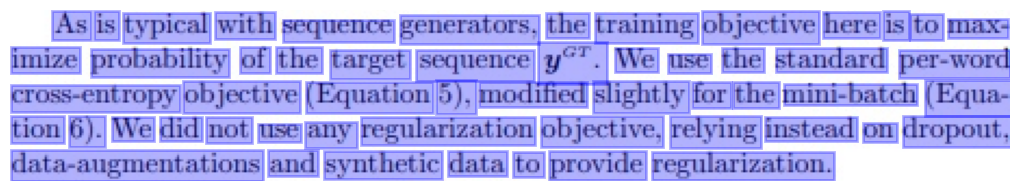

In [ ]:
#result.show(doc)
res = result
res.show()

In [ ]:
export = result.export()
print(export)
# Flatten the export
page_words = [[word for block in page['blocks'] for line in block['lines'] for word in line['words']] for page in export['pages']]
page_dims = [page['dimensions'] for page in export['pages']]
# Get the coords in [xmin, ymin, xmax, ymax]
words_abs_coords = [
    [[int(round(word['geometry'][0][0] * dims[0])), int(round(word['geometry'][0][1] * dims[1])), int(round(word['geometry'][1][0] * dims[0])), int(round(word['geometry'][1][1] * dims[1]))] for word in words]
    for words, dims in zip(page_words, page_dims)

]
print(words_abs_coords)


{'pages': [{'page_idx': 0, 'dimensions': (79, 461), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.041015625, 0.0), (0.9970703125, 0.19227155854430378)), 'lines': [{'geometry': ((0.041015625, 0.0), (0.9970703125, 0.19227155854430378)), 'words': [{'value': 'As', 'confidence': 0.9993077516555786, 'geometry': ((0.041015625, 0.0), (0.080078125, 0.16947685917721517))}, {'value': 'is', 'confidence': 0.9998369216918945, 'geometry': ((0.0830078125, 0.0), (0.1083984375, 0.16947685917721517))}, {'value': 'typical', 'confidence': 0.9953458905220032, 'geometry': ((0.1123046875, 0.015612638449367111), (0.19921875, 0.18657288370253167))}, {'value': 'with', 'confidence': 0.510453462600708, 'geometry': ((0.2041015625, 0.009913963607594944), (0.263671875, 0.16377818433544306))}, {'value': 'sequence', 'confidence': 0.9967420697212219, 'geometry': ((0.271484375, 0.05550336234177217), (0.3828125, 0.1808742088607595))}, {'val

In [ ]:
print(export[])

In [ ]:
import math
img = cv2.imread("test/test.jpg", cv2.IMREAD_COLOR)
def convert_coordinates(geometry, page_dim):
    len_x = page_dim[1]
    len_y = page_dim[0]
    (x_min, y_min) = geometry[0]
    (x_max, y_max) = geometry[1]
    x_min = math.floor(x_min * len_x)
    x_max = math.ceil(x_max * len_x)
    y_min = math.floor(y_min * len_y)
    y_max = math.ceil(y_max * len_y)
    return [x_min, x_max, y_min, y_max]
def get_coordinates(output):
    page_dim = output['pages'][0]["dimensions"]
    text_coordinates = []
    for obj1 in output['pages'][0]["blocks"]:
        for obj2 in obj1["lines"]:
            for obj3 in obj2["words"]:
                converted_coordinates = convert_coordinates(
                                           obj3["geometry"],page_dim
                                          )
                text_coordinates.append((converted_coordinates,obj3["value"]))
    return text_coordinates
boxes = get_coordinates(export)

import PIL
from PIL import ImageDraw,Image
import matplotlib.pyplot as plt
def draw_bounds(image, bound):
    draw = ImageDraw.Draw(image)
    for b in bound:
        p0, p1, p2, p3 = [b[0][0],b[0][2]], [b[0][1],b[0][2]], \
                         [b[0][1],b[0][3]], [b[0][0],b[0][3]]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill='blue', width=2)
        img= Image.open('test/test.jpg')
        cropped_img = img.crop((b[0][0] , b[0][2] , b[0][0] , b[0][3]))
        cropped_img.show()
    return image
image = PIL.Image.open('test/test.jpg')
result_image = draw_bounds(image, boxes)
plt.figure(figsize=(15,15))
plt.imshow(result_image)





SystemError: tile cannot extend outside image

([18, 37, 0, 14], 'As')
18


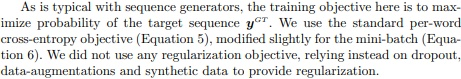

38


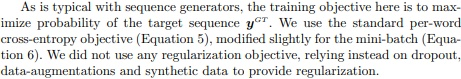

51


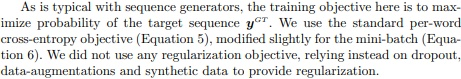

94


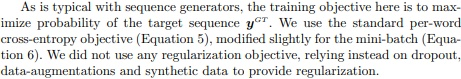

125


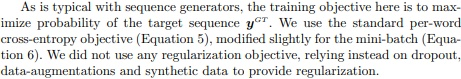

179


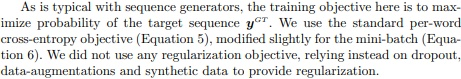

246


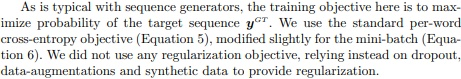

269


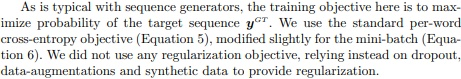

318


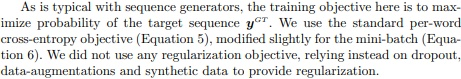

374


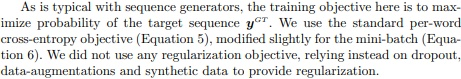

402


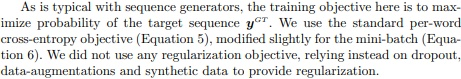

414


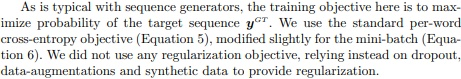

431


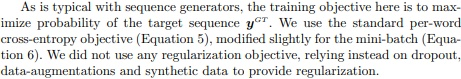

0


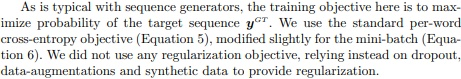

36


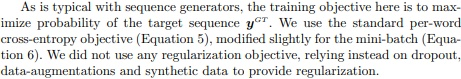

105


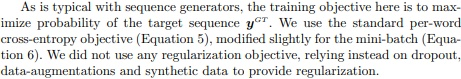

122


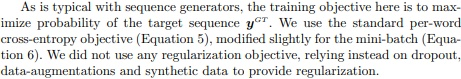

147


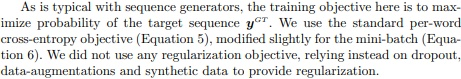

186


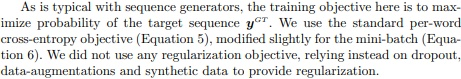

243


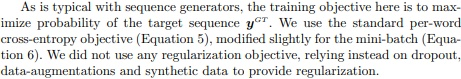

278


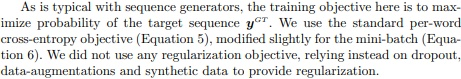

302


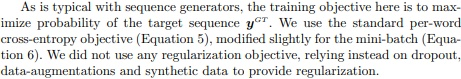

327


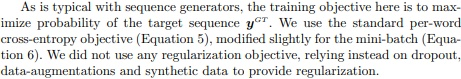

352


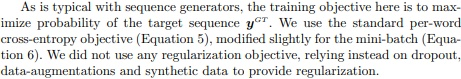

409


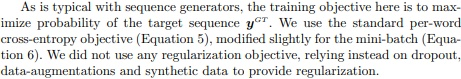

0


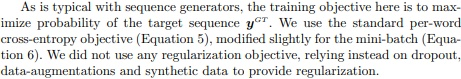

79


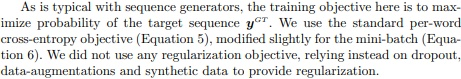

135


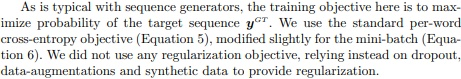

195


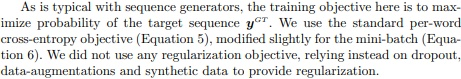

215


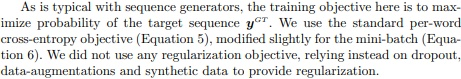

268


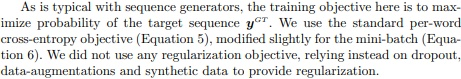

313


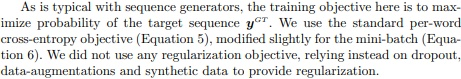

332


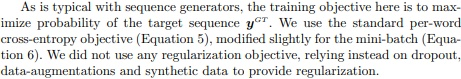

356


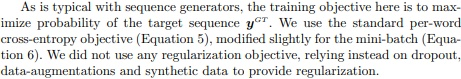

421


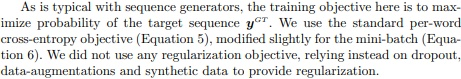

0


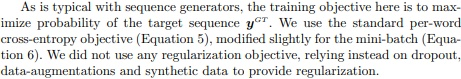

26


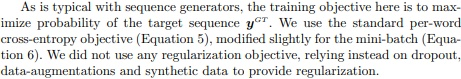

46


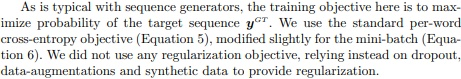

68


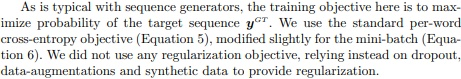

90


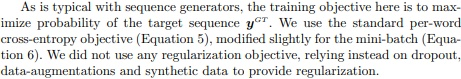

113


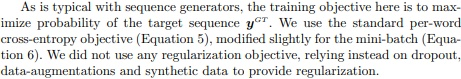

135


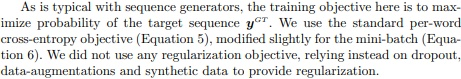

161


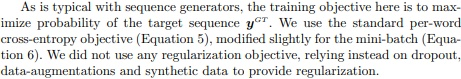

244


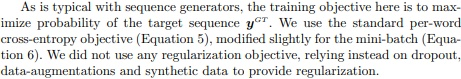

303


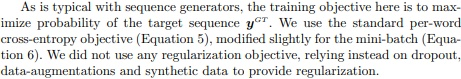

347


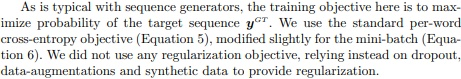

392


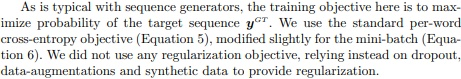

411


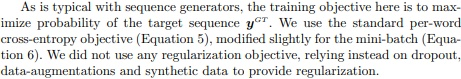

0


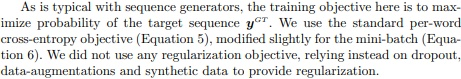

118


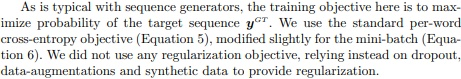

144


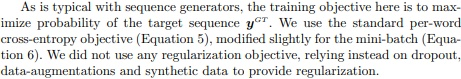

201


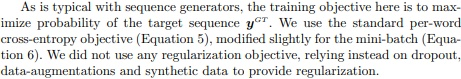

231


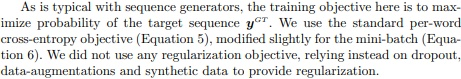

248


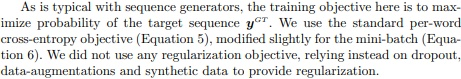

295


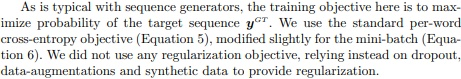

In [ ]:
print(boxes[0])
for box in boxes:
  x_min = box[0][0]
  print(x_min)
  x_max = box[0][1]
  y_min = box[0][2]
  y_max= box[0][3]
  img = cv2.imread("test/test.jpg", cv2.IMREAD_COLOR)
  crop = img[xmin:xmax, ymin:ymax]
  cv2_imshow(crop)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("test/test.jpg", cv2.IMREAD_COLOR)

# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array

for coords in words_abs_coords[0]:
  print(coords)
  xmin=coords[0]
  ymin=coords[1]
  xmax=coords[2]
  ymax=coords[3]

  crop = img[xmin:xmax+3, ymin:ymax+3]
  cv2_imshow(crop)

[3, 0, 6, 78]


[7, 0, 9, 78]


[9, 7, 16, 86]


[16, 5, 21, 76]


[21, 26, 30, 83]


[31, 12, 42, 89]


[42, 7, 46, 73]


[46, 7, 54, 86]


[55, 2, 64, 89]


[64, 5, 69, 73]


[69, 0, 71, 78]


[71, 10, 74, 78]


[74, 23, 79, 73]


[0, 97, 5, 167]


[6, 102, 17, 178]


[18, 97, 20, 167]


[21, 97, 25, 167]


[25, 104, 31, 183]


[32, 104, 41, 188]


[42, 83, 47, 196]


[48, 99, 51, 165]


[52, 118, 55, 167]


[56, 99, 59, 165]


[60, 99, 69, 165]


[70, 104, 79, 181]


[0, 199, 13, 273]


[14, 188, 23, 275]


[23, 191, 33, 275]


[34, 186, 37, 278]


[37, 191, 46, 259]


[46, 188, 54, 275]


[54, 191, 57, 262]


[57, 191, 61, 262]


[61, 196, 72, 254]


[72, 186, 79, 283]


[0, 283, 4, 357]


[5, 283, 7, 367]


[8, 286, 11, 351]


[12, 286, 15, 351]


[15, 286, 19, 357]


[20, 304, 23, 354]


[23, 299, 27, 370]


[28, 286, 41, 362]


[42, 283, 52, 367]


[52, 283, 59, 370]


[60, 286, 67, 351]


[67, 301, 70, 354]


[70, 283, 79, 367]


[0, 375, 20, 459]


[20, 375, 24, 446]


[25, 378, 34, 454]


[34, 378, 39, 446]


[40, 380, 42, 449]


[43, 378, 50, 456]


[51, 380, 65, 456]


# STEP test

In [ ]:
!wget http://datasets.cvc.uab.es/STEP/TESTR_pretrain_ht_final.pth -P ckp

--2024-03-13 16:09:14--  http://datasets.cvc.uab.es/STEP/TESTR_pretrain_ht_final.pth
Resolving datasets.cvc.uab.es (datasets.cvc.uab.es)... 158.109.8.18
Connecting to datasets.cvc.uab.es (datasets.cvc.uab.es)|158.109.8.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 593094448 (566M)
Saving to: ‘ckp/TESTR_pretrain_ht_final.pth’

TESTR_pretrain_ht_f 100%[===================>] 565.62M  1.81MB/s    in 5m 13s  

2024-03-13 16:14:28 (1.81 MB/s) - ‘ckp/TESTR_pretrain_ht_final.pth’ saved [593094448/593094448]



In [ ]:
!git clone https://github.com/CVC-DAG/STEP.git
%cd STEP
#!conda create -n STEP python=3.8 -y
#!conda install pytorch==1.10.1 torchvision==0.11.2 cudatoolkit=11.3 cudatoolkit-dev=11.3 -c pytorch -c conda-forge
!pip install torchvision
!python -m pip install scipy numba
#!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html!python setup.py build develop
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2

Cloning into 'STEP'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 110 (delta 15), reused 99 (delta 10), pack-reused 0
Receiving objects: 100% (110/110), 803.90 KiB | 3.35 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/STEP/STEP/STEP/STEP
Cloning into 'detectron2'...
remote: Enumerating objects: 15508, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 15508 (delta 66), reused 178 (delta 42), pack-reused 15275
Receiving objects: 100% (15508/15508), 6.39 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (11177/11177), done.
Obtaining file:///content/STEP/STEP/STEP/STEP/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.2 MB/s

In [ ]:
!python inference/demo.py --config-file configs/STEP/hiertext/STEP_R_50_Polygon.yaml --input test --opts MODEL.WEIGHTS ckp/TESTR_pretrain_ht_final.pth MODEL.TRANSFORMER.INFERENCE_TH_TEST 0.3

Traceback (most recent call last):
  File "/content/STEP/STEP/STEP/STEP/inference/demo.py", line 14, in <module>
    from predictor import VisualizationDemo
  File "/content/STEP/STEP/STEP/STEP/inference/predictor.py", line 16, in <module>
    from adet.utils.visualizer import TextVisualizer
ModuleNotFoundError: No module named 'adet'


# CRAFT test

In [ ]:
%cd /content

/content


In [ ]:
!ls

ckp  sample_data  src  STEP  test


In [ ]:
!pip install scikit-image scipy

In [ ]:
!git clone https://github.com/clovaai/CRAFT-pytorch/

Cloning into 'CRAFT-pytorch'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Receiving objects: 100% (59/59), 1.69 MiB | 3.03 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
file_id = '1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ'
url = f'https://docs.google.com/uc?export=download&id={file_id}&confirm=t'
!wget model.pth {url}

--2024-03-13 17:17:08--  http://model.pth/
Resolving model.pth (model.pth)... failed: Name or service not known.
wget: unable to resolve host address ‘model.pth’
--2024-03-13 17:17:08--  https://docs.google.com/uc?export=download
Resolving docs.google.com (docs.google.com)... 108.177.125.100, 108.177.125.113, 108.177.125.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.100|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2024-03-13 17:17:08 ERROR 400: Bad Request.



In [ ]:
!python CRAFT-pytorch/test.py --trained_model=model.pth --test_folder=test

Traceback (most recent call last):
  File "/content/CRAFT-pytorch/test.py", line 28, in <module>
    from craft import CRAFT
  File "/content/CRAFT-pytorch/craft.py", line 11, in <module>
    from basenet.vgg16_bn import vgg16_bn, init_weights
  File "/content/CRAFT-pytorch/basenet/vgg16_bn.py", line 7, in <module>
    from torchvision.models.vgg import model_urls
ImportError: cannot import name 'model_urls' from 'torchvision.models.vgg' (/usr/local/lib/python3.10/dist-packages/torchvision/models/vgg.py)
